**Домашнее задание** - Фильтрация картинок при помощи pytorch torch.nn.Conv2d

Прочитайте внимательно статью про то, что такое свёртка:

https://programforyou.ru/poleznoe/convolutional-network-from-scratch-part-zero-introduction

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms

Пусть задана цветная картинка с изображением бабочки:

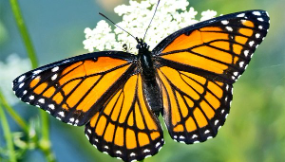

In [2]:
filename = 'image.png'
image = Image.open(filename)
image = image.convert('RGB')
image

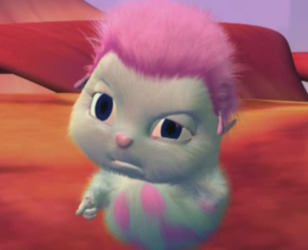

In [3]:
filename = 'bibl.jpg'
bibl = Image.open(filename)
bibl = bibl.convert('RGB')
bibl

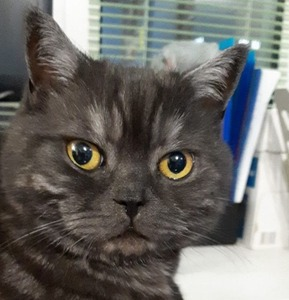

In [4]:
filename = 'pups1.jpg'
pups = Image.open(filename)
pups = pups.convert('RGB')
pups

Цель задания в том, чтобы реализовать функцию, которая бы по заданным входному изображению и матрицей размера 3x3, получала бы фильтрованное изображение, как на рисунке ниже:

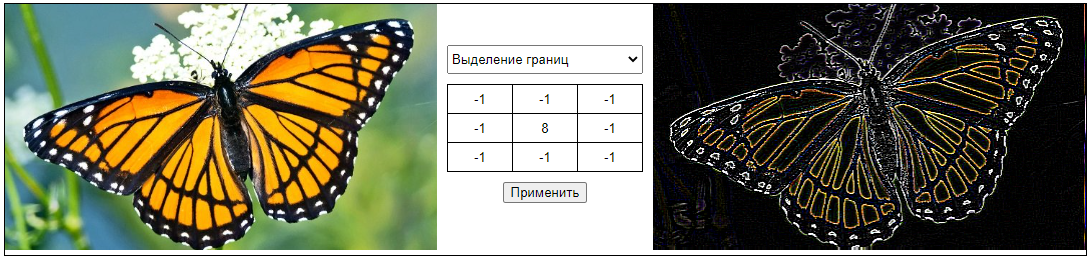

In [5]:
filename = 'laplace filter.png'
filter_example = Image.open(filename)
filter_example = filter_example.convert('RGB')
filter_example

In [6]:
def filtr(W, image):
    conv_model = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, 
                           padding = 0, stride = 1, groups = 3, bias = False)
    with torch.no_grad():
        conv_model.weight.copy_(W)
    t1 = transforms.ToTensor()
    tensor_image = t1(image)
    tensor_image = tensor_image.unsqueeze(dim=0)
    
    result = conv_model(tensor_image)
    result = result.squeeze(dim=0)
    res = result.detach().numpy()
    res[res < 0] = 0
    res[res > 1] = 1
    
    t2 = transforms.ToPILImage()
    new_image = t2(torch.from_numpy(res))
    return new_image

In [20]:
normal = torch.tensor([[[[0.,0,0],[0,1,0],[0,0,0]]],  
                       [[[0.,0,0],[0,1,0],[0,0,0]]],
                       [[[0.,0,0],[0,1,0],[0,0,0]]]])

contours_x = torch.tensor([[[[-1.,-2,-1],[0,0,0],[1,2,1]]], 
                          [[[-1.,-2,-1],[0,0,0],[1,2,1]]],
                          [[[-1.,-2,-1],[0,0,0],[1,2,1]]]])

contours_y = torch.tensor([[[[-1.,0,1],[-2,0,2],[-1,0,1]]], 
                           [[[-1.,0,1],[-2,0,2],[-1,0,1]]],
                           [[[-1.,0,1],[-2,0,2],[-1,0,1]]]])

contours = torch.tensor([[[[-1.,-1,-1],[-1,8,-1],[-1,-1,-1]]], 
                         [[[-1.,-1,-1],[-1,8,-1],[-1,-1,-1]]],
                         [[[-1.,-1,-1],[-1,8,-1],[-1,-1,-1]]]])

sharpness = torch.tensor([[[[-0.2,-0.8,-0.2],[-0.8,5,-0.8],[-0.2,-0.8,-0.2]]], 
                          [[[-0.2,-0.8,-0.2],[-0.8,5,-0.8],[-0.2,-0.8,-0.2]]],
                          [[[-0.2,-0.8,-0.2],[-0.8,5,-0.8],[-0.2,-0.8,-0.2]]]])

blur = torch.tensor([[[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]], 
                     [[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]],
                     [[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]]]])

gauss = torch.tensor([[[[0.05,0.1,0.05],[0.1,0.3,0.1],[0.05,0.1,0.05]]], 
                      [[[0.05,0.1,0.05],[0.1,0.3,0.1],[0.05,0.1,0.05]]],
                      [[[0.05,0.1,0.05],[0.1,0.3,0.1],[0.05,0.1,0.05]]]])

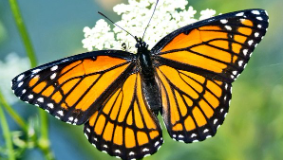

In [21]:
filtr(normal, image)

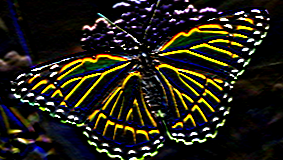

In [22]:
filtr(contours_x, image)

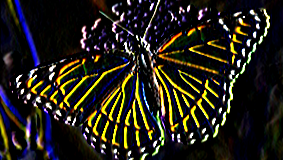

In [23]:
filtr(contours_y, image)

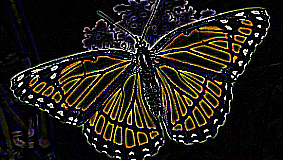

In [24]:
filtr(contours, image)

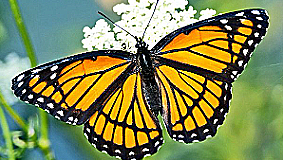

In [25]:
filtr(sharpness, image)

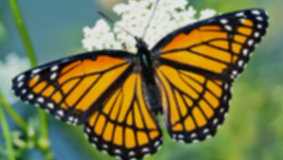

In [26]:
filtr(blur, image)

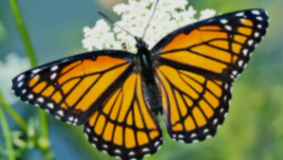

In [27]:
filtr(gauss, image)

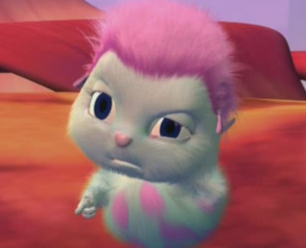

In [28]:
filtr(normal, bibl)

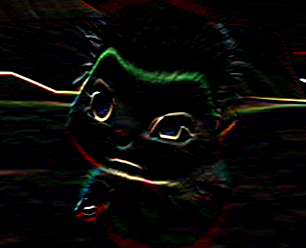

In [29]:
filtr(contours_x, bibl)

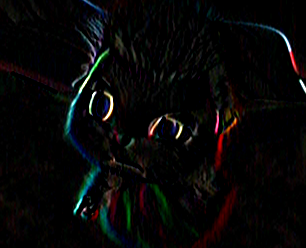

In [30]:
filtr(contours_y, bibl)

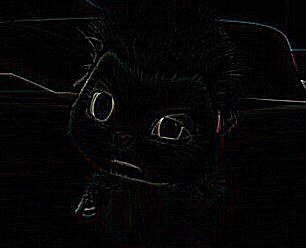

In [31]:
filtr(contours, bibl)

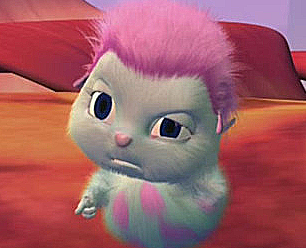

In [32]:
filtr(sharpness, bibl)

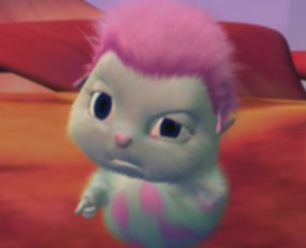

In [33]:
filtr(blur, bibl)

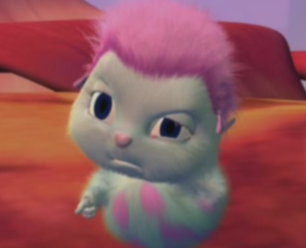

In [34]:
filtr(gauss, bibl)

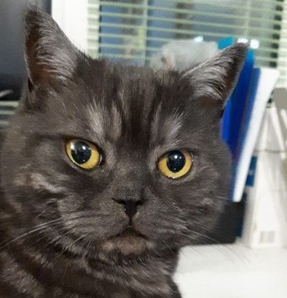

In [35]:
filtr(normal, pups)

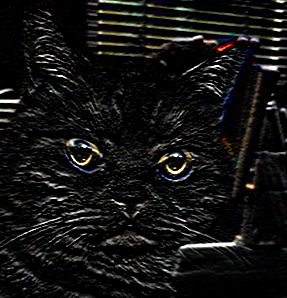

In [36]:
filtr(contours_x, pups)

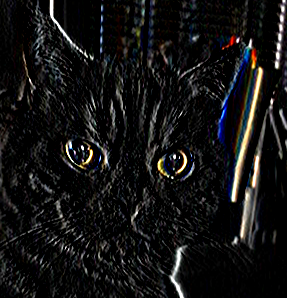

In [37]:
filtr(contours_y, pups)

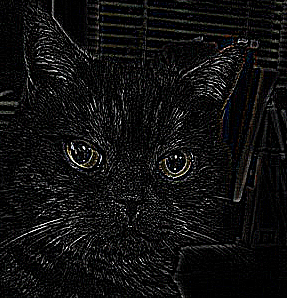

In [38]:
filtr(contours, pups)

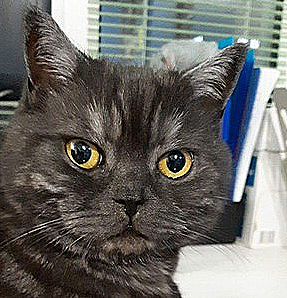

In [39]:
filtr(sharpness, pups)

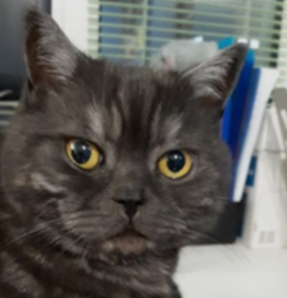

In [40]:
filtr(blur, pups)

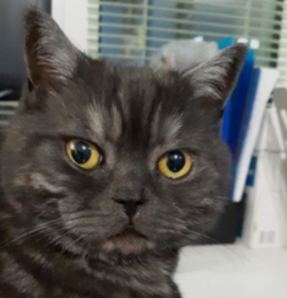

In [41]:
filtr(gauss, pups)